In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Importing data using CSV file
file = 'EMS_ML.csv'
ems_df = pd.read_csv(file)
del ems_df['Unnamed: 0']
ems_df.head()

,Severity,Borough,Hour_of_Incident,Weekday,Response_Time
0,4,BRONX,0,Tuesday,797.0
1,3,BRONX,0,Tuesday,851.0
2,1,QUEENS,0,Tuesday,429.0
3,6,BRONX,0,Tuesday,828.0
4,5,BRONX,0,Tuesday,856.0


# Multiple Linear Regression Model

In [3]:
dummies = pd.get_dummies(ems_df, columns=['Borough','Hour_of_Incident','Weekday'])
dummies = dummies.drop(['Severity'], axis=1)
dummies.head()

,Response_Time,Borough_BRONX,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND,Hour_of_Incident_0,Hour_of_Incident_1,Hour_of_Incident_2,Hour_of_Incident_3,...,Hour_of_Incident_21,Hour_of_Incident_22,Hour_of_Incident_23,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,797.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,851.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,429.0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,828.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,856.0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
ems_ml = pd.concat([ems_df, dummies], axis='columns')
ems_ml = ems_ml.drop(['Borough','Hour_of_Incident','Weekday'], axis=1)
ems_ml = ems_ml.loc[:,~ems_ml.columns.duplicated()]

ems_ml.head()

,Severity,Response_Time,Borough_BRONX,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND,Hour_of_Incident_0,Hour_of_Incident_1,Hour_of_Incident_2,...,Hour_of_Incident_21,Hour_of_Incident_22,Hour_of_Incident_23,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,4,797.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,851.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,429.0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,828.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,856.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [5]:
X = ems_ml[['Severity','Borough_BRONX','Borough_BROOKLYN','Borough_MANHATTAN','Borough_QUEENS','Borough_STATEN ISLAND',
            'Hour_of_Incident_0','Hour_of_Incident_1','Hour_of_Incident_2','Hour_of_Incident_3','Hour_of_Incident_4',
            'Hour_of_Incident_5','Hour_of_Incident_6','Hour_of_Incident_7','Hour_of_Incident_8','Hour_of_Incident_9',
            'Hour_of_Incident_10','Hour_of_Incident_11','Hour_of_Incident_12','Hour_of_Incident_13','Hour_of_Incident_14',
            'Hour_of_Incident_15','Hour_of_Incident_16','Hour_of_Incident_17','Hour_of_Incident_18','Hour_of_Incident_19',
            'Hour_of_Incident_20','Hour_of_Incident_21','Hour_of_Incident_22','Hour_of_Incident_23','Weekday_Monday',
            'Weekday_Tuesday','Weekday_Wednesday','Weekday_Thursday','Weekday_Friday','Weekday_Saturday','Weekday_Sunday']]

y = ems_ml['Response_Time'].values.reshape(-1,1)

print(X.shape, y.shape)

(2000000, 37) (2000000, 1)


In [6]:
# Use train_test_split to create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
# Fit the model to the training data and calculate the scores for the training and testing data
model = LinearRegression()

model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.08551599149069233
Testing Score: 0.08773118689473325


In [8]:
# Scale the data
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

C:\Users\cblas\Anaconda1\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\cblas\Anaconda1\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  """
C:\Users\cblas\Anaconda1\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  


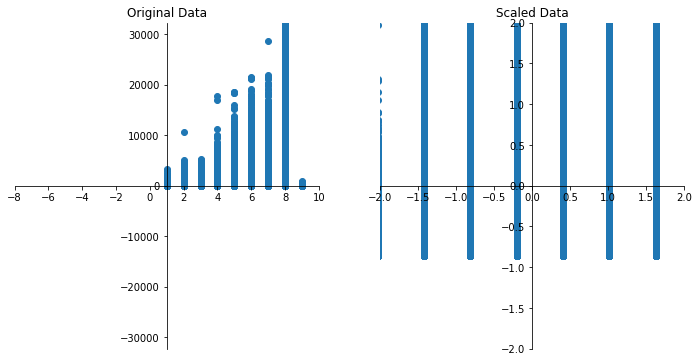

In [9]:
# PLotting the original and scaled data
fig1 = plt.figure(figsize=(12, 6))
axes1 = fig1.add_subplot(1, 2, 1)
axes2 = fig1.add_subplot(1, 2, 2)

axes1.set_title("Original Data")
axes2.set_title("Scaled Data")

maxx = X_train["Severity"].max()
maxy = y_train.max()
axes1.set_xlim(-maxx + 1, maxx + 1)
axes1.set_ylim(-maxy + 1, maxy + 1)

axes2.set_xlim(-2, 2)
axes2.set_ylim(-2, 2)

def set_axes(ax):
    ax.spines['left'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('center')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
set_axes(axes1)
set_axes(axes2)

axes1.scatter(X_train["Severity"], y_train)
axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])
plt.show()

In [10]:
# Fit the scaled train data
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

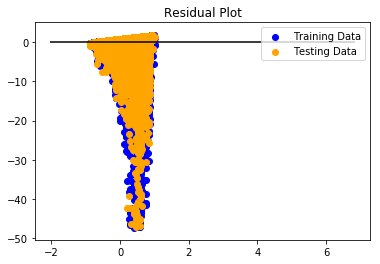

In [11]:
# Plotting the residuals for the training and test data
predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=X_test_scaled.min(), xmax=X_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [ ]:
# Used X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
# LASSO model
# Note: Use an alpha of .01 when creating the model for this activity
lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
# Ridge model
# Note: Use an alpha of .01 when creating the model for this activity
ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

In [ ]:
# ElasticNet model
# Note: Use an alpha of .01 when creating the model for this activity
elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

In [4]:
model.score(X,y)

NameError: name 'model' is not defined

# One Hot Encoding

In [53]:
# ONE HOT ENCODING

le = LabelEncoder()

In [54]:
# Create new dataframe to fit and transform
dfle = ems_df
dfle.Borough = le.fit_transform(dfle.Borough)
dfle.Hour_of_Incident = le.fit_transform(dfle.Hour_of_Incident)
dfle.Weekday = le.fit_transform(dfle.Weekday)

dfle.head()

,Severity,Borough,Hour_of_Incident,Weekday,Response_Time
0,4,0,0,5,797.0
1,3,0,0,5,851.0
2,1,3,0,5,429.0
3,6,0,0,5,828.0
4,5,0,0,5,856.0


In [55]:
X = dfle[['Severity', 'Borough','Hour_of_Incident','Weekday']].values
y = dfle['Response_Time'].values.reshape(-1,1)

In [56]:
ohe = OneHotEncoder()
X = ohe.fit_transform(X).toarray()
print(X.shape, y.shape)

C:\Users\cblas\Anaconda1\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


(2000000, 45) (2000000, 1)


In [57]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [58]:
model.score(X,y)

0.10614724146332344

# Random Forest Classifier

In [1]:
rf_ems = ems_ml.head(500)

NameError: name 'ems_ml' is not defined

In [18]:
target = ems_ml['Response_Time']

In [20]:
data = ems_ml.drop("Response_Time", axis=1)
feature_names = data.columns
data.head()

,Severity,Borough_BRONX,Borough_BROOKLYN,Borough_MANHATTAN,Borough_QUEENS,Borough_STATEN ISLAND,Hour_of_Incident_0,Hour_of_Incident_1,Hour_of_Incident_2,Hour_of_Incident_3,...,Hour_of_Incident_21,Hour_of_Incident_22,Hour_of_Incident_23,Weekday_Friday,Weekday_Monday,Weekday_Saturday,Weekday_Sunday,Weekday_Thursday,Weekday_Tuesday,Weekday_Wednesday
0,4,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,3,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=200)
rf = rf.fit(X_train, y_train)
rf.score(X_test, y_test)

MemoryError: could not allocate 1034420224 bytes